<a href="https://colab.research.google.com/github/MarianaSargsyan2/ML_Fall2024/blob/main/BonusTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

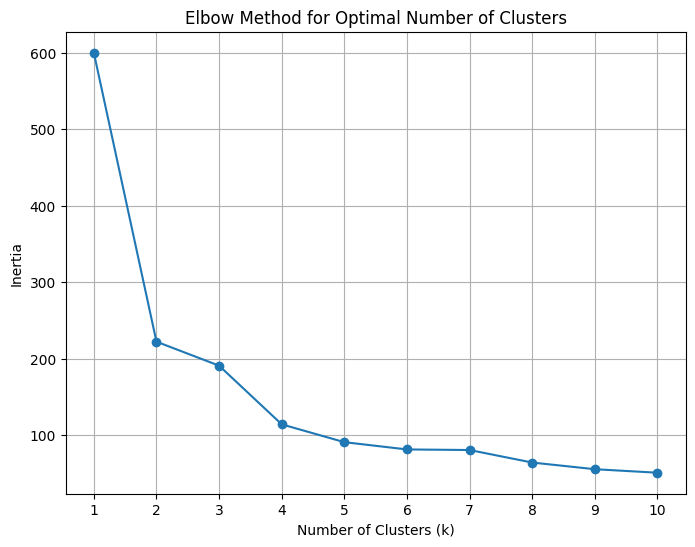

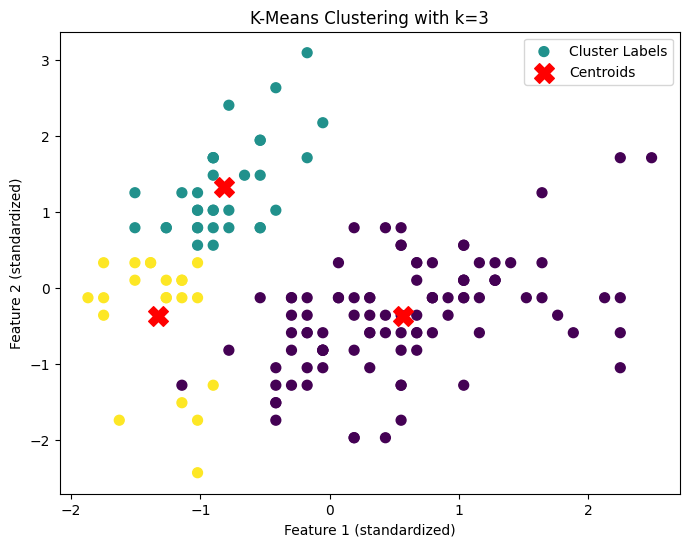

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Loading Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(K)
plt.grid()
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, label='Cluster Labels')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.legend()
plt.show()


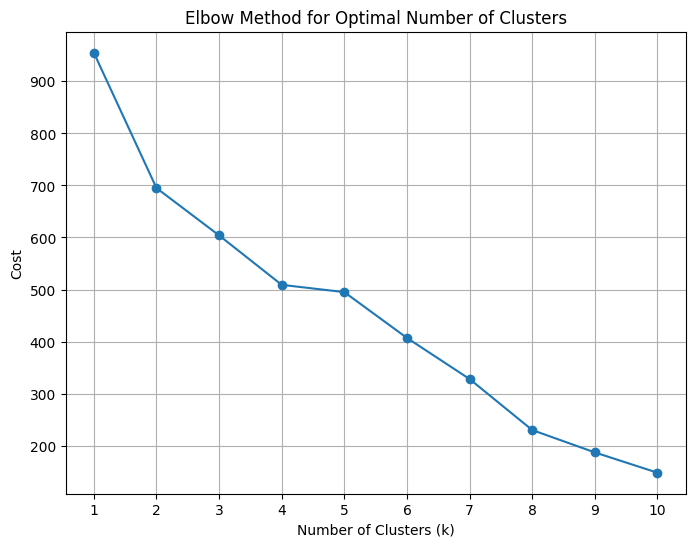

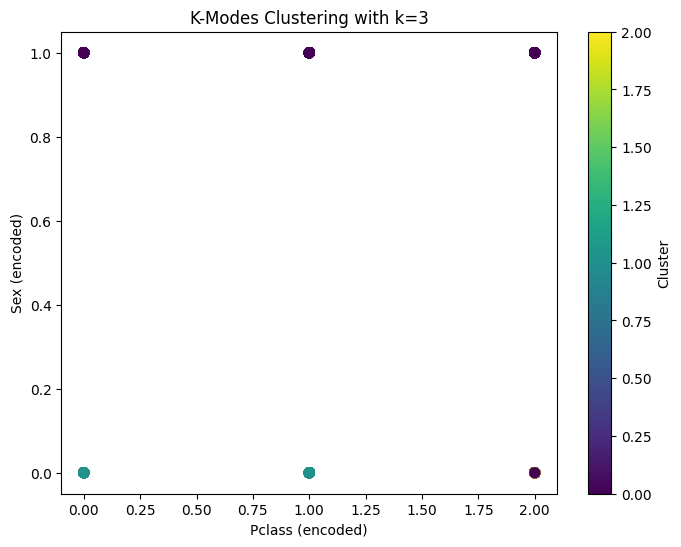

In [4]:
!pip install kmodes
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)


categorical_cols = ['Pclass', 'Sex', 'Embarked']
data_categorical = data[categorical_cols].dropna()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_categorical[col] = le.fit_transform(data_categorical[col])
    label_encoders[col] = le

cost = []
K = range(1, 11)
for k in K:
    km = KModes(n_clusters=k, init='Cao', random_state=42)
    km.fit(data_categorical)
    cost.append(km.cost_)

plt.figure(figsize=(8, 6))
plt.plot(K, cost, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.xticks(K)
plt.grid()
plt.show()

optimal_k = 3
km = KModes(n_clusters=optimal_k, init='Cao', random_state=42)
labels = km.fit_predict(data_categorical)

data_categorical['Cluster'] = labels

plt.figure(figsize=(8, 6))
plt.scatter(data_categorical['Pclass'], data_categorical['Sex'], c=labels, cmap='viridis', s=50, label='Cluster Labels')
plt.title(f"K-Modes Clustering with k={optimal_k}")
plt.xlabel("Pclass (encoded)")
plt.ylabel("Sex (encoded)")
plt.colorbar(label='Cluster')
plt.show()


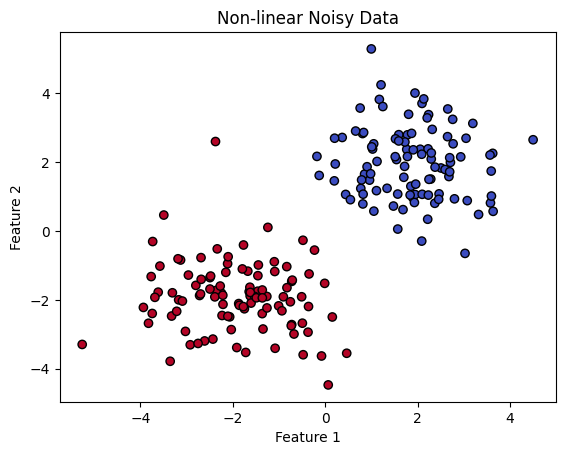

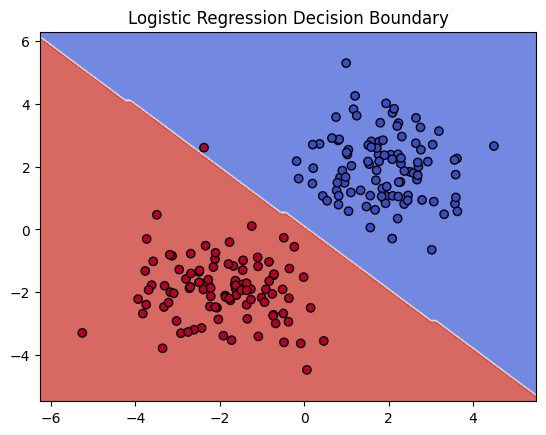

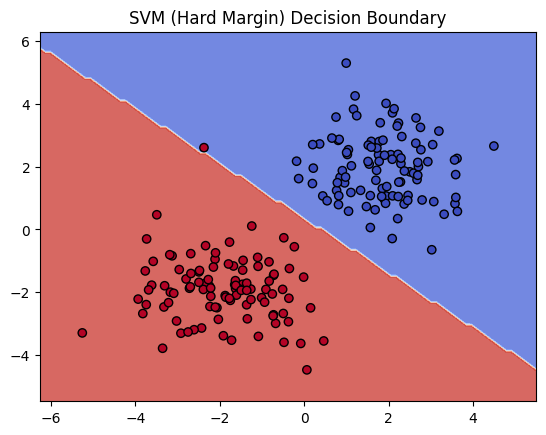

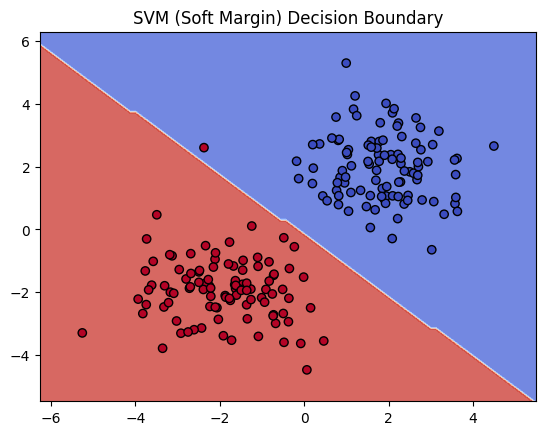

Logistic Regression Accuracy: 0.9833333333333333
SVM (Hard Margin) Accuracy: 0.9833333333333333
SVM (Soft Margin) Accuracy: 0.9833333333333333


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
n_samples = 200
X1 = np.random.randn(n_samples // 2, 2) + [2, 2]
X2 = np.random.randn(n_samples // 2, 2) + [-2, -2]
X = np.vstack([X1, X2])
y = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])

X += 0.5 * np.random.randn(n_samples, 2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Non-linear Noisy Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# a) Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("Logistic Regression Decision Boundary")
plt.show()

# b) Support Vector Machine
# Hard Margin
svm_hard = SVC(kernel='linear', C=1e10)
svm_hard.fit(X_train, y_train)
y_pred_svm_hard = svm_hard.predict(X_test)

Z_hard = svm_hard.predict(np.c_[xx.ravel(), yy.ravel()])
Z_hard = Z_hard.reshape(xx.shape)

plt.contourf(xx, yy, Z_hard, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("SVM (Hard Margin) Decision Boundary")
plt.show()

# Soft Margin
svm_soft = SVC(kernel='linear', C=0.1)
svm_soft.fit(X_train, y_train)
y_pred_svm_soft = svm_soft.predict(X_test)

Z_soft = svm_soft.predict(np.c_[xx.ravel(), yy.ravel()])
Z_soft = Z_soft.reshape(xx.shape)

plt.contourf(xx, yy, Z_soft, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("SVM (Soft Margin) Decision Boundary")
plt.show()

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("SVM (Hard Margin) Accuracy:", accuracy_score(y_test, y_pred_svm_hard))
print("SVM (Soft Margin) Accuracy:", accuracy_score(y_test, y_pred_svm_soft))
